In [45]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os
import matplotlib.pylab as plt
from library.objective_function import *

In [46]:
from library.experiments import *
from library.objective_function import *
from library.optimiser import *

In [77]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)
ad = adam()
optParas = {
         'x0': torch.tensor([164.23, 23.523], requires_grad=True),
         'alpha': 0.1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-6,              
         'verbose': True,
         'record': False }
ad.set_parameters(optParas)
exp.set_optimizer(ad)
exp.do()



*******starting optimisation from intitial point:  tensor([164.2300,  23.5230], grad_fn=<SqueezeBackward0>)
total evaluatios = 185
gradient at stop position = tensor([-6.4603e-05, -6.4827e-04]),
modified graident = tensor([ 6.2634e-05, -1.9428e-07])
found minimum position = tensor([164.0000,  24.0000], requires_grad=True), found minimum = 20.0
Result:  local minimum
found minimum: 20.0, minimum position: [163.99998   23.999987], evals: 185


/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



('local minimum', tensor(20., grad_fn=<AddBackward0>), 185)

In [96]:
class line_search(adjust_optimizer):
    def __init__(self, alpha=1, beta=0.1):
        self.alpha = alpha
        self.beta = beta
        self.max_iter = 100
        self.tol = 1e-2
        self.verbose = False
        self.record = False
     
    def set_parameters(self, paras):
        self.paras = paras
        self.x0 = paras['x0']
        self.alpha = paras['alpha']
        self.beta = paras['beta']
        self.max_iter = paras['max_iter']
        self.tol = paras['tol']
        self.verbose = True if 'verbose' not in paras.keys() else paras['verbose']
        self.record = True if 'record' not in paras.keys() else paras['record']
    def optimise(self, obj):
        '''
        @param x0: initial point position
        @param alpha: initial step size
        @param beta: control the armijo condition
        @return x: point position after moving to local minimum
        '''
        x = self.x0
        alpha_ = self.alpha
        tao = 0.5
        fx = obj.func(x)
        p = - obj.dfunc(x)
        fnx = obj.func(x + alpha_ * p)
        eval_cnt = 3
        stats = {}
        stats['status'] = None
        stats['gradient'] = []
        stats['arg'] = []
        stats['val'] = []
        if self.record:
            stats['arg'].append(x.clone())
            stats['val'].append(fx)
            stats['gradient'].append(-p)
        if self.verbose:
            print("\n*******starting optimisation from intitial point: ", self.x0.squeeze())
        for k in range(self.max_iter):
            while fnx > fx + alpha_ * self.beta * (-p @ p):
                alpha_ *= tao
                fnx = obj.func(x + alpha_ * p)
                eval_cnt += 1
            with torch.no_grad():
                x += alpha_ * p
            fx = fnx
            x = x.clone()
            x = torch.tensor(x, requires_grad=True)
            p = -obj.dfunc(x)
            print(p, obj.dfuncR(x))
            fnx = obj.func(x + alpha_ * p)
            eval_cnt += 2
            if self.record:
                stats['arg'].append(x.clone())
                #print(eval_cnt, stats['arg'])
                stats['val'].append(fx)
                stats['gradient'].append(-p)
            if torch.norm(p) < self.tol:
                break
        stats['evals'] = eval_cnt
        if self.verbose:
            print('total evaluatios = {}'.format(eval_cnt))
            print('gradient at stop position = {}'.format(-p))
            print('found minimum position = {}, found minimum = {}'.format(x, fx))
        stats['arg'] = np.array(stats['arg'])
        stats['val'] = np.array(stats['val'])
        stats['gradient'] = np.array(stats['gradient'])
        return x, fnx, stats

In [95]:
lb = __import__("library.optimiser")

In [97]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)
ln = line_search()
optParas = {
    'x0': torch.tensor([16.23, 23.023], requires_grad=True),
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 1000,
    'tol': 1e-3,              
    'verbose': True,
    'record': False
}
ln.set_parameters(optParas)
exp.set_optimizer(ln)
exp.do()


*******starting optimisation from intitial point:  tensor([16.2300, 23.0230], grad_fn=<SqueezeBackward0>)
tensor([4.8368, 1.3211]) tensor([-4.8368, -1.3211], grad_fn=<AddBackward0>)
tensor([-2.0730, -0.6880]) tensor([2.0730, 0.6880], grad_fn=<AddBackward0>)
tensor([1.3317, 0.4499]) tensor([-1.3317, -0.4499], grad_fn=<AddBackward0>)
tensor([-0.8813, -0.2996]) tensor([0.8813, 0.2996], grad_fn=<AddBackward0>)
tensor([0.5912, 0.2014]) tensor([-0.5912, -0.2014], grad_fn=<AddBackward0>)
tensor([-0.3982, -0.1357]) tensor([0.3982, 0.1357], grad_fn=<AddBackward0>)
tensor([0.2690, 0.0917]) tensor([-0.2690, -0.0917], grad_fn=<AddBackward0>)
tensor([-0.1817, -0.0620]) tensor([0.1817, 0.0620], grad_fn=<AddBackward0>)
tensor([0.1229, 0.0418]) tensor([-0.1229, -0.0418], grad_fn=<AddBackward0>)
tensor([-0.0831, -0.0282]) tensor([0.0831, 0.0282], grad_fn=<AddBackward0>)
tensor([0.0562, 0.0192]) tensor([-0.0562, -0.0192], grad_fn=<AddBackward0>)
tensor([-0.0380, -0.0130]) tensor([0.0380, 0.0130], grad_

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



('local minimum', tensor(19.6196, grad_fn=<AddBackward0>), 41)

In [ ]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)
ln = line_search()
optParas = {
    'x0': torch.tensor([16.23, 23.023], requires_grad=True),
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 1000,
    'tol': 1e-3,              
    'verbose': True,
    'record': False
}
ln.set_parameters(optParas)
exp.set_optimizer(ln)
exp.do()

In [368]:
class nns(nn.Module):
    def __init__(self):
         super(nns, self).__init__()
    def forward(self, x):
        y = torch.sum(3.2 * x**2);
        print(x)
        print(y)
        return y
ns = nns()
x = torch.tensor([-0.000021, 0.000021], requires_grad=True)
out = ns(x)
y = out

tensor([-2.1000e-05,  2.1000e-05], requires_grad=True)
tensor(2.8224e-09, grad_fn=<SumBackward0>)


In [369]:
y.backward(retain_graph=True)
x.grad

tensor([-0.0001,  0.0001])

In [374]:
optimizer = torch.optim.Adam([x], lr=0.0000001)

In [375]:
x.is_sparse

False

In [376]:
#optimizer.zero_grad()
x_pre = x.clone()
optimizer.step()
x_pre - x

tensor([-9.9884e-08,  9.9884e-08], grad_fn=<SubBackward0>)

In [353]:
x

tensor([-0.9970,  0.0180], requires_grad=True)

In [227]:
(out1).requires_grad

True

In [127]:
xn = torch.tensor([out, out], requires_grad=True)
out1 = ns(xn) * xn.grad
out1.backward()
xn.grad

tensor([20., 20.], requires_grad=True)
tensor(2560., grad_fn=<SumBackward0>)


TypeError: unsupported operand type(s) for *: 'Tensor' and 'NoneType'

In [117]:
x.grad

tensor([ 9.6000, 12.8000])

In [116]:
out.backward()

In [27]:
torch.zeros(8).unsqueeze(0).reshape(-1,1)@torch.zeros(8).unsqueeze(0).reshape(1,-1)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [64]:
torch.zeros(8, dtype=torch.float32).unsqueeze(0).dtype

torch.float32

In [48]:
np.linalg.eig(x)

(array([ 27.42778432, -24.42778432]),
 array([[ 0.78291993, -0.77104454],
        [ 0.62212248,  0.63678121]]))

In [55]:
a,b=torch.eig(torch.tensor(x,dtype=float), eigenvectors=True)

In [59]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [57]:
b

tensor([[ 0.7829, -0.7710],
        [ 0.6221,  0.6368]], dtype=torch.float64)

In [44]:
torch.tensor([True]).int()

tensor([1], dtype=torch.int32)

In [46]:
np.array([2]).astype(float)

array([2.])

$\mathcal{L}_{new} = \sum_{v \in V}{ \left( -\frac{\partial \mathcal{L}_{task}}{\partial v} \nabla f_{\theta}(v, z) \right) f_{\theta}(v,z)}$

In [10]:
losses = np.load("/Users/huajian/Downloads/MinimalDeepSDF/data/loss.npy")
lambdas = np.load("/Users/huajian/Downloads/MinimalDeepSDF/data/lambdas.npy")

Text(0, 0.5, 'loss')

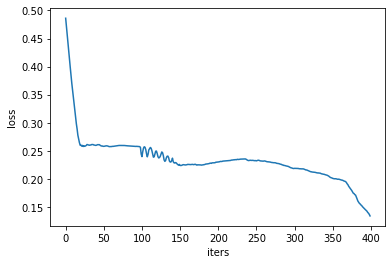

In [14]:
plt.plot(losses)
plt.xlabel("iters")
plt.ylabel("loss")

Text(0, 0.5, 'lambdas')

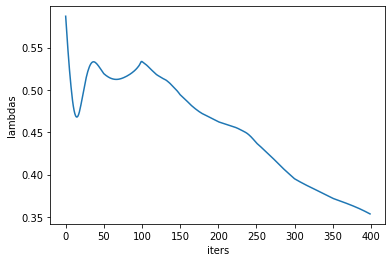

In [15]:
plt.plot(lambdas)
plt.xlabel("iters")
plt.ylabel("lambdas")

## toy neural network

In [39]:
# Define model
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [4875503568, 4875501808, 4873249888, 4873249088, 4873249648, 4874232848, 4873015456, 4874298864, 4870762976, 4870766016]}]


In [83]:
model.train(True)

TheModelClass(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
np.array(model.state_dict()['conv1.weight'][0,1,2,2])

array(0.01352374, dtype=float32)

## tensor manipulation

In [9]:
## neural network weights
all_codes = torch.load("../MinimalDeepSDF/example1/LatentCodes/latest.pth", map_location=torch.device("cpu"))
all_codes.keys()

dict_keys(['epoch', 'latent_codes'])

In [11]:
all_codes['epoch']

750

In [19]:
# sphere
sphere = all_codes['latent_codes']['weight'][999]
sphere

tensor([-0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323, -0.1601, -0.1239])

In [61]:
sphere.unsqueeze(0).detach().shape

torch.Size([1, 8])

In [20]:
# torsus
torsus = all_codes['latent_codes']['weight'][2]
torsus

tensor([-0.0562, -0.2882,  0.1230,  0.2264,  0.0941,  0.1983,  0.1402, -0.1180])

In [63]:
torch.cat([sphere.unsqueeze(0), torsus.reshape(1,-1)], 1).shape

torch.Size([1, 16])

In [3]:
# best got by Adam 
PATH399 = "/Users/huajian/Downloads/MinimalDeepSDF/example1/Optimizations/750/Codes/399.pth"
code399 = torch.load(PATH399).squeeze()
code399

tensor([-0.1588, -0.3376,  0.0932, -0.0402,  0.1580,  0.2382, -0.0432, -0.0909],
       grad_fn=<SqueezeBackward0>)

In [9]:
code399.detach().numpy()

array([-0.15883543, -0.33760908,  0.09318182, -0.0401662 ,  0.15800397,
        0.2382426 , -0.04322775, -0.09089346], dtype=float32)

In [31]:
# distance between found optimum and initial guess
(code399 - sphere).norm()

tensor(0.3747, grad_fn=<NormBackward0>)

In [32]:
# distance between found optimum and global minimum
(code399 - torsus).norm()

tensor(0.3535, grad_fn=<NormBackward0>)

In [45]:
torch.norm(code399,2)

tensor(0.4913, grad_fn=<NormBackward0>)

In [46]:
torch.norm(torsus,2)

tensor(0.4841)

In [47]:
torch.norm(sphere,2)

tensor(0.7349)

In [13]:
torch.arange(0,10,1, out=torch.LongTensor())/2

tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])

In [4]:
code399

tensor([-0.1588, -0.3376,  0.0932, -0.0402,  0.1580,  0.2382, -0.0432, -0.0909],
       grad_fn=<SqueezeBackward0>)

In [6]:
torch.tensor([1,2]).grad

## remark:
direction is consistent

In [33]:
# target direction
torsus - sphere

tensor([ 0.2851,  0.1876,  0.2754,  0.2032, -0.0545, -0.1340,  0.3002,  0.0058])

In [34]:
code399 - sphere

tensor([ 0.1824,  0.1383,  0.2456, -0.0633,  0.0094, -0.0941,  0.1168,  0.0330],
       grad_fn=<SubBackward0>)

In [35]:
(torsus - sphere).dot(code399 - sphere)

tensor(0.1801, grad_fn=<DotBackward>)

In [5]:
os.path.dirname(PATH399)

'/Users/huajian/Downloads/MinimalDeepSDF/example1/Optimizations/750/Codes'

In [2]:
# code of sphere
PATH0 = "/Users/huajian/Downloads/MinimalDeepSDF/example1/Optimizations/750/Codes/0.pth"
code0 = torch.load(PATH0, map_location=torch.device('cpu'))
code0

tensor([[[-0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323, -0.1601,
          -0.1239]]], requires_grad=True)

In [11]:
code0.unsqueeze(-1).shape

torch.Size([1, 1, 8, 1])

In [20]:
code0.repeat(2,1,2)

tensor([[[-0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323, -0.1601,
          -0.1239, -0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323,
          -0.1601, -0.1239]],

        [[-0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323, -0.1601,
          -0.1239, -0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323,
          -0.1601, -0.1239]]], grad_fn=<RepeatBackward>)

In [56]:
code0.expand(2,-1,-1)

tensor([[[-0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323, -0.1601,
          -0.1239]],

        [[-0.3412, -0.4759, -0.1524,  0.0231,  0.1486,  0.3323, -0.1601,
          -0.1239]]], grad_fn=<ExpandBackward>)

In [23]:
code0.transpose(2,0)

tensor([[[-0.3412]],

        [[-0.4759]],

        [[-0.1524]],

        [[ 0.0231]],

        [[ 0.1486]],

        [[ 0.3323]],

        [[-0.1601]],

        [[-0.1239]]], grad_fn=<TransposeBackward0>)

## MinimalDeepSDF

In [25]:
#python optim.py -s example1/synth_test.json -e example1
__name__

'__main__'

In [19]:
m = __import__("library.optimiser", globals(), fromlist=["do_nothing", "cma_es"])
m.cma_es()

In [4]:
## neural network weights
saved_model_state = torch.load("../MinimalDeepSDF/example1/ModelParameters/latest.pth", map_location=torch.device("cpu"))
saved_model_state["epoch"]

750

In [10]:
saved_model_state.keys()

dict_keys(['epoch', 'model_state_dict'])

In [36]:
type(saved_model_state)

dict

In [42]:
## mass code representation of torus
split = json.load(open("../MinimalDeepSDF/example1/synth_test.json", "r"))
type(split)

dict

In [59]:
all_codes = torch.load("../MinimalDeepSDF/example1/LatentCodes/latest.pth")['latent_codes']['weight']
type(all_codes)

torch.Tensor

In [60]:
all_codes.shape

torch.Size([1000, 8])

In [70]:
a = all_codes[0]

In [65]:
all_codes[0].detach().requires_grad

False

In [76]:
a = a.detach()

In [78]:
a.requires_grad = True

In [79]:
a.requires_grad 

True

In [ ]:
lr= 8e-3
l2reg= True
decreased_by = 1.5    
adjust_lr_every = 50

N_MARCHING_CUBE = 64
regl2 = 1e-3

$lr_t = lr_0  (\frac{1}{\alpha})^{\frac{t}{t_p}}$

$lr_t = 8e^{-3} (\frac{1}{1.5})^{\frac{t}{50}}$

In [ ]:
#!/usr/bin/env python3
# Copyright 2004-present Facebook. All Rights Reserved.

import argparse
import json
import logging
import os
import random
import time
import torch
import numpy as np

import deep_sdf
import deep_sdf.workspace as ws

import pdb

def adjust_learning_rate(initial_lr, optimizer, num_iterations, decreased_by, adjust_lr_every):
    lr = initial_lr * ((1 / decreased_by) ** (num_iterations // adjust_lr_every))
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

def chamfer_distance(p1, p2):
    '''
    Calculate Chamfer Distance between two point sets
    '''

    p1 = p1.unsqueeze(0)
    p2 = p2.unsqueeze(0)

    p1 = p1.repeat(p2.size(1), 1, 1)
    p1 = p1.transpose(0, 1)

    p2 = p2.repeat(p1.size(0), 1, 1)

    # compute distance tensor
    dist = torch.add(p1, torch.neg(p2))
    dist = torch.norm(dist, 2, dim=2)

    dist1, _ = torch.min(dist, dim = 1)
    dist2, _ = torch.min(dist, dim = 0)

    return torch.mean(dist1) + torch.mean(dist2)

In [ ]:
if __name__ == "__main__":

    arg_parser = argparse.ArgumentParser(
        description="Use a trained DeepSDF decoder to reconstruct a shape given SDF samples."
    )
    arg_parser.add_argument(
        "--experiment",
        "-e",
        dest="experiment_directory",
        required=True,
        help="The experiment directory which includes specifications and saved model "
        + "files to use for reconstruction",
    )
    arg_parser.add_argument(
        "--checkpoint",
        "-c",
        dest="checkpoint",
        default="latest",
        help="The checkpoint weights to use. This can be a number indicating an epoch "
        + "or 'latest' for the latest weights (this is the default)",
    )
    arg_parser.add_argument(
        "--split",
        "-s",
        dest="split_filename",
        required=True,
        help="The split to reconstruct.",
    )
    arg_parser.add_argument(
        "--iters",
        dest="iterations",
        default=400,
        help="The number of iterations of latent code optimization to perform.",
    )
    


    # Initialization
    N_MARCHING_CUBE = 64
    deep_sdf.add_common_args(arg_parser)
    args = arg_parser.parse_args()
    deep_sdf.configure_logging(args)

    specs_filename = os.path.join(args.experiment_directory, "specs.json")

    if not os.path.isfile(specs_filename):
        raise Exception(
            'The experiment directory does not include specifications file "specs.json"'
        )

    specs = json.load(open(specs_filename))
    arch = __import__("networks." + specs["NetworkArch"], fromlist=["Decoder"])
    latent_size = specs["CodeLength"]




    # Load decoder: this is our black box function
    decoder = arch.Decoder(latent_size, **specs["NetworkSpecs"])
    decoder = torch.nn.DataParallel(decoder)
    saved_model_state = torch.load(
        os.path.join(
            args.experiment_directory, ws.model_params_subdir, args.checkpoint + ".pth"
        ),
        map_location=torch.device('cpu') # Remove this if you want to run on GPU
    )
    saved_model_epoch = saved_model_state["epoch"]
    decoder.load_state_dict(saved_model_state["model_state_dict"])
    # Optionally: put decoder on GPU
    #decoder = decoder.module.cuda()


    ## read by here

    logging.debug(decoder)
    optimization_dir = os.path.join(
        args.experiment_directory, ws.optimizations_subdir, str(saved_model_epoch)
    )

    if not os.path.isdir(optimization_dir):
        os.makedirs(optimization_dir)

    optimization_meshes_dir = os.path.join(
        optimization_dir, ws.optimizations_meshes_subdir
    )
    if not os.path.isdir(optimization_meshes_dir):
        os.makedirs(optimization_meshes_dir)

    optimization_codes_dir = os.path.join(
        optimization_dir, ws.optimizations_codes_subdir
    )
    if not os.path.isdir(optimization_codes_dir):
        os.makedirs(optimization_codes_dir)





    torch.manual_seed(0)
    lr= 8e-3
    l2reg= True
    decreased_by = 1.5
    adjust_lr_every = 50




    # pick initialization and samples
    # Load collection of all latent codes
    all_codes_path = os.path.join(
        args.experiment_directory,
        ws.latent_codes_subdir,
        'latest.pth')
    all_codes = torch.load(all_codes_path)['latent_codes']['weight']




    source_id = 999 # zywvjkvz2492e6xpq4hd1jzy2r9lht        # This will be the source shape (ie starting point)
    latent = all_codes[source_id].unsqueeze(0).detach()#.cuda()   #Add .cuda() if you want to run on GPU
    latent.requires_grad = True

    target_id = 2 # 0bucd9ryckhaqtqvbiagilujeqzek4          # This is be the target shape (ie objective)
    latent_target = all_codes[target_id].unsqueeze(0).detach()#.cuda()   #Add .cuda() if you want to run on GPU





    # Get a mesh representation of the target shape
    verts_target, faces_target = deep_sdf.mesh.create_mesh_optim(
        decoder, latent_target, N=N_MARCHING_CUBE, max_batch=int(2 ** 18)
    )

    # Store the mesh
    mesh_filename = os.path.join(optimization_meshes_dir, "target") + ".ply"
    if not os.path.exists(os.path.dirname(mesh_filename)):
        os.makedirs(os.path.dirname(mesh_filename))
    deep_sdf.mesh.write_verts_faces_to_file(verts_target, faces_target, mesh_filename)




    optimizer = torch.optim.Adam([latent], lr=lr)

    losses = []
    lambdas = []

    verts_target_sample = verts_target[torch.randperm(verts_target.shape[0])]
    verts_target_sample = verts_target_sample[0:20000, :]
    np.save(os.path.join(optimization_meshes_dir, "target_verts.npy"), verts_target_sample)

    regl2 = 1e-3



    # first show latent interpolation form source to target for reference
    for i in range(21):
        alpha = i/20
        print("interpolate at:", alpha)
        latent_interp = alpha*latent_target + (1-alpha)*latent
        verts, faces = deep_sdf.mesh.create_mesh_optim(
            decoder, latent_interp, N=N_MARCHING_CUBE, max_batch=int(2 ** 18)
        )
        mesh_filename = os.path.join(optimization_meshes_dir, "interpolation_" + str(i)) + ".ply"
        if not os.path.exists(os.path.dirname(mesh_filename)):
            os.makedirs(os.path.dirname(mesh_filename))
        deep_sdf.mesh.write_verts_faces_to_file(verts, faces, mesh_filename)



    # Use Adam optimizer, with source as starting point, and a loss defined on meshes
    # latent is the input of our function
    print("Starting optimization:")
    for e in range(args.iterations):


        # Get a point cloud sampling of the target shape
        verts_target_sample = verts_target[torch.randperm(verts_target.shape[0])]
        verts_target_sample = verts_target_sample[0:20000, :]
        xyz_target = torch.tensor(verts_target_sample.astype(float), requires_grad = False, dtype=torch.float32) # For GPU, add: , device=torch.device('cuda:0'))

        decoder.eval()
        adjust_learning_rate(lr, optimizer, e, decreased_by, adjust_lr_every)
        optimizer.zero_grad()







        start = time.time()
        # Get a mesh representation of our current guess: decoder is evaluated at position latent
        # first create mesh running full forward pass
        verts, faces = deep_sdf.mesh.create_mesh_optim(
            decoder, latent, N=N_MARCHING_CUBE, max_batch=int(2 ** 18)
        )
        end = time.time()
        print("time to mesh:", end-start)





        # store the current mesh for visualization
        mesh_filename   = os.path.join(optimization_meshes_dir, str(e) + ".ply")
        latent_filename = os.path.join(optimization_codes_dir,  str(e) + ".pth")


        if not os.path.exists(os.path.dirname(mesh_filename)):
            os.makedirs(os.path.dirname(mesh_filename))
        deep_sdf.mesh.write_verts_faces_to_file(verts, faces, mesh_filename)

        if not os.path.exists(os.path.dirname(latent_filename)):
            os.makedirs(os.path.dirname(latent_filename))
        torch.save(latent.unsqueeze(0), latent_filename)




        # subsample vertices for gradients computations
        verts = verts[torch.randperm(verts.shape[0])]
        verts = verts[0:20000, :]
        start = time.time()
        # forward pass within loss layer
        xyz_upstream = torch.tensor(verts.astype(float), requires_grad = True, dtype=torch.float32)#, device=torch.device('cuda:0')) # For GPU,

       


        # At this point we have 2 outputs for decoder: the target xyz_target, and the current value xyz_upstream
        # The following lines compute a loss and backpropagate

        # compute loss function: Chamfer between current guess (xyz_upstream) and objective (xyz_target)
        loss = chamfer_distance(xyz_upstream, xyz_target)
        print("Loss at iter", e, ":", loss.item(), ", latent norm: ", torch.norm(latent) )
        losses.append(loss.detach().cpu().numpy())                                  ## Loss value
        #np.save(os.path.join(optimization_meshes_dir, "log.npy"), losses)
        lambdas.append(torch.norm(latent_target-latent).detach().cpu().numpy())     ## Distance in the domain
        #np.save(os.path.join(optimization_meshes_dir, "lambda.npy"), lambdas)
        


        # now store upstream gradients
        loss.backward()
        dL_dx_i = xyz_upstream.grad
        optimizer.zero_grad()





        # use vertices to compute full backward pass
        xyz = torch.tensor(verts.astype(float), requires_grad = True,dtype=torch.float32)#, device=torch.device('cuda:0')) # For GPU,
        latent_inputs = latent.expand(xyz.shape[0], -1)
        inputs = torch.cat([latent_inputs, xyz], 1)#.cuda()      #Add .cuda() if you want to run on GPU
        #first compute normals
        pred_sdf = decoder(inputs)



        loss_normals = torch.sum(pred_sdf)
        loss_normals.backward(retain_graph = True)
        normals = xyz.grad/torch.norm(xyz.grad, 2, 1).unsqueeze(-1)
        # now assemble inflow derivative
        optimizer.zero_grad()
        dL_ds_i_fast = -torch.matmul(dL_dx_i.unsqueeze(1), normals.unsqueeze(-1)).squeeze(-1)
        loss_backward = torch.sum(dL_ds_i_fast * pred_sdf)



        if e % 20 == 0 and e > 0:
            regl2 = regl2/2
        if l2reg:
            loss_backward+= regl2* torch.mean(latent.pow(2))


        # Backpropagate
        loss_backward.backward()

        end = time.time()
        print("time to backward:", end-start)

        # update latent
        # Explicit gradient is accessible via latent.grad
        optimizer.step()
